In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [2]:
salary_train = pd.read_csv("SalaryData_train.csv")
salary_test = pd.read_csv("SalaryData_test.csv")

In [3]:
salary_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [4]:
salary_train.shape

(30161, 14)

In [5]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary_train_new=salary_train.drop('educationno',axis=1)
#axis=0 means dropping labels from index while 1 means dropping labels from columns

In [7]:
salary_train_new.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
str_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [17]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
for i in str_col:
    salary_train_new[i] = labelEncoder.fit_transform(salary_train_new[i])
    
salary_train_new.head(15)

age  workclass  education  maritalstatus  occupation  relationship  race  \
0    39          5          9              4           0             1     4   
1    50          4          9              2           3             0     4   
2    38          2         11              0           5             1     4   
3    53          2          1              2           5             0     2   
4    28          2          9              2           9             5     2   
5    37          2         12              2           3             5     4   
6    49          2          6              3           7             1     2   
7    52          4         11              2           3             0     4   
8    31          2         12              4           9             1     4   
9    42          2          9              2           3             0     4   
10   37          2         15              2           3             0     2   
11   30          5          9              2           9             0     1   
12   23          2          9              4           0             3     4   
13   32          2          7              4          11             1     2   
14   34          2          5              2          13             0     0   

    sex  capitalgain  capitalloss  hoursperweek  native  Salary  
0     1         2174            0            40      37   <=50K  
1     1            0            0            13      37   <=50K  
2     1            0            0            40      37   <=50K  
3     1            0            0            40      37   <=50K  
4     0            0            0            40       4   <=50K  
5     0            0            0            40      37   <=50K  
6     0            0            0            16      21   <=50K  
7     1            0            0            45      37    >50K  
8     0        14084            0            50      37    >50K  
9     1         5178            0            40      37    >50K  
10    1            0            0            80      37    >50K  
11    1            0            0            40      17    >50K  
12    0            0            0            30      37   <=50K  
13    1            0            0            50      37   <=50K  
14    1            0            0            45      24   <=50K

In [10]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [11]:
salary_test_new = salary_test.drop("educationno", axis =1)

In [12]:
str_col_test=["workclass","education", "maritalstatus","occupation","relationship","race", "sex","native"]

In [13]:
for i in str_col_test:
    salary_test_new[i] = labelEncoder.fit_transform(salary_test_new[i])

In [14]:
salary_train_new.shape

(30161, 13)

In [15]:
salary_test_new.shape

(15060, 13)

In [16]:
salary_train_new.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [17]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [18]:
# Finds corr between valid (numeric) columns
salary_train.corr(numeric_only = True)

age  educationno  capitalgain  capitalloss  hoursperweek
age           1.000000     0.043525     0.080152     0.060278      0.101598
educationno   0.043525     1.000000     0.124416     0.079691      0.152522
capitalgain   0.080152     0.124416     1.000000    -0.032218      0.080431
capitalloss   0.060278     0.079691    -0.032218     1.000000      0.052454
hoursperweek  0.101598     0.152522     0.080431     0.052454      1.000000

In [19]:
salary_test_new.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
salary_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int32 
 2   education      15060 non-null  int32 
 3   maritalstatus  15060 non-null  int32 
 4   occupation     15060 non-null  int32 
 5   relationship   15060 non-null  int32 
 6   race           15060 non-null  int32 
 7   sex            15060 non-null  int32 
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  int32 
 12  Salary         15060 non-null  object
dtypes: int32(8), int64(4), object(1)
memory usage: 1.0+ MB


In [21]:
salary_test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int32 
 2   education      15060 non-null  int32 
 3   maritalstatus  15060 non-null  int32 
 4   occupation     15060 non-null  int32 
 5   relationship   15060 non-null  int32 
 6   race           15060 non-null  int32 
 7   sex            15060 non-null  int32 
 8   capitalgain    15060 non-null  int64 
 9   capitalloss    15060 non-null  int64 
 10  hoursperweek   15060 non-null  int64 
 11  native         15060 non-null  int32 
 12  Salary         15060 non-null  object
dtypes: int32(8), int64(4), object(1)
memory usage: 1.0+ MB


<Axes: xlabel='Salary', ylabel='occupation'>

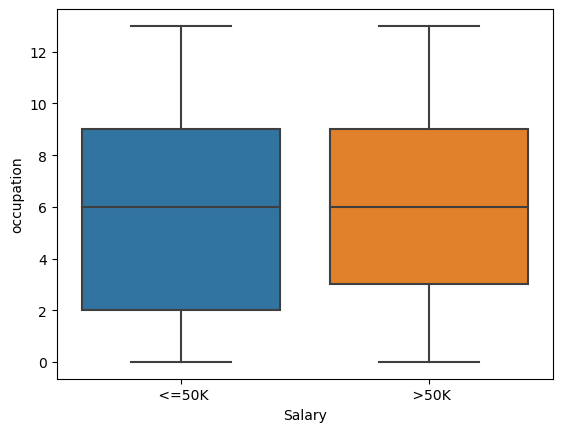

In [22]:
sns.boxplot(x = "Salary", y ="occupation" ,data =salary_train_new )

<Axes: xlabel='Salary', ylabel='maritalstatus'>

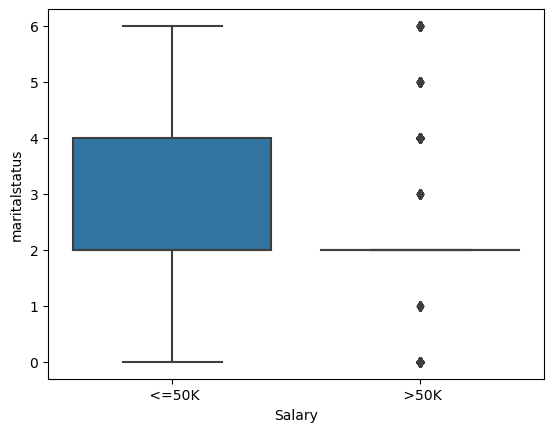

In [23]:
sns.boxplot(x = "Salary", y = "maritalstatus",data =salary_train_new )

<Axes: xlabel='Salary', ylabel='age'>

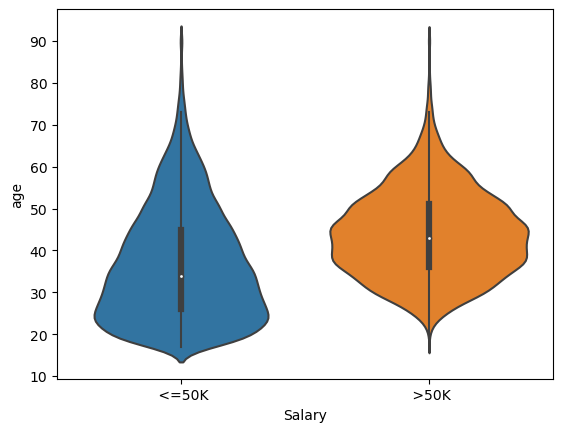

In [24]:
sns.violinplot(x ="Salary" , y = "age",data =salary_train_new )

<Axes: xlabel='capitalgain', ylabel='hoursperweek'>

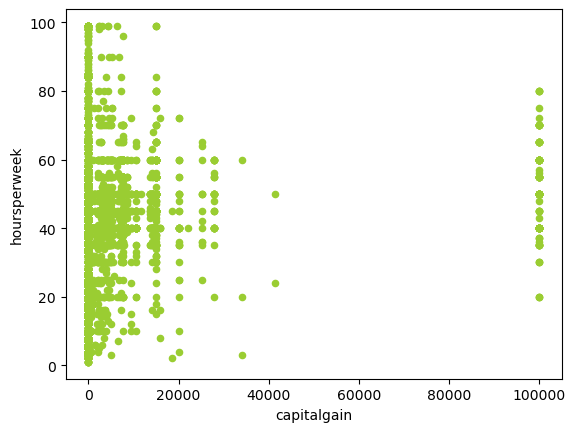

In [25]:
salary_train.plot(kind= "scatter", x="capitalgain", y="hoursperweek", c = "yellowgreen")

<Axes: >

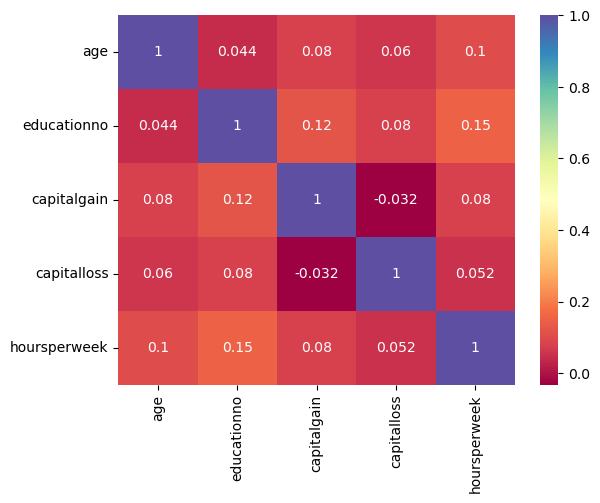

In [26]:
sns.heatmap(data =salary_train.corr(numeric_only = True), annot = True, cmap="Spectral")

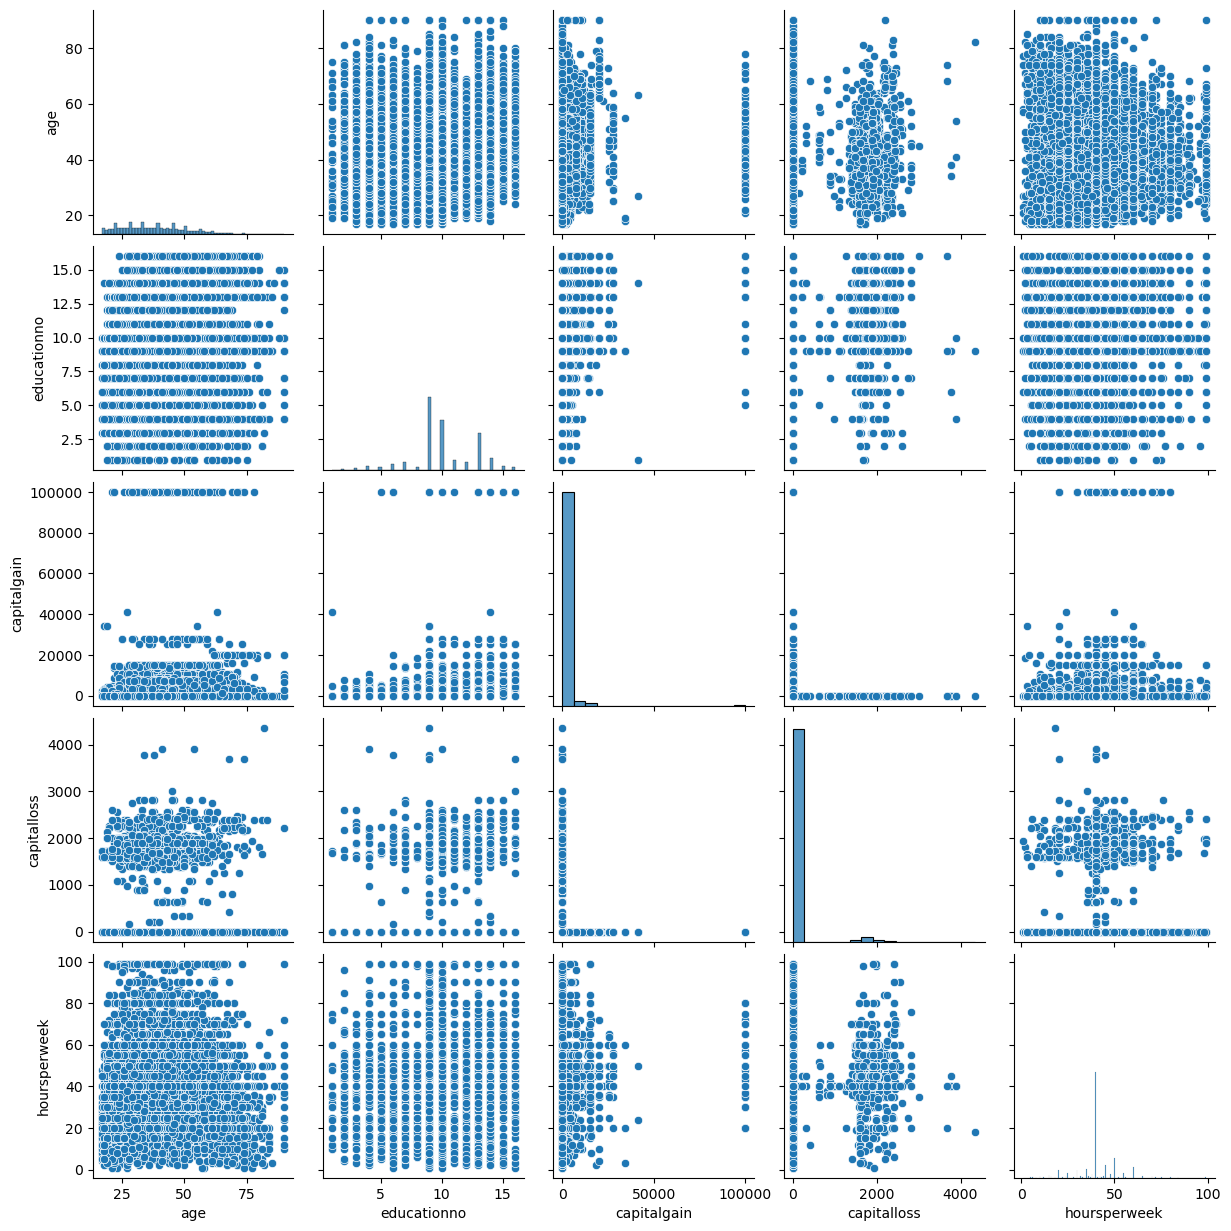

In [27]:
sns.pairplot(data = salary_train)

In [28]:
x_train = salary_train_new.iloc[: ,0:12]
x_train

age  workclass  education  maritalstatus  occupation  relationship  \
0       39          5          9              4           0             1   
1       50          4          9              2           3             0   
2       38          2         11              0           5             1   
3       53          2          1              2           5             0   
4       28          2          9              2           9             5   
...    ...        ...        ...            ...         ...           ...   
30156   27          2          7              2          12             5   
30157   40          2         11              2           6             0   
30158   58          2         11              6           0             4   
30159   22          2         11              4           0             3   
30160   52          3         11              2           3             5   

       race  sex  capitalgain  capitalloss  hoursperweek  native  
0         4    1         2174            0            40      37  
1         4    1            0            0            13      37  
2         4    1            0            0            40      37  
3         2    1            0            0            40      37  
4         2    0            0            0            40       4  
...     ...  ...          ...          ...           ...     ...  
30156     4    0            0            0            38      37  
30157     4    1            0            0            40      37  
30158     4    0            0            0            40      37  
30159     4    1            0            0            20      37  
30160     4    0        15024            0            40      37  

[30161 rows x 12 columns]

In [29]:
y_train= salary_train_new.iloc[:,12]
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [30]:
x_test = salary_test_new.iloc[:,0:12]
y_test = salary_test_new.iloc[:,12]

In [31]:
x_test

age  workclass  education  maritalstatus  occupation  relationship  \
0       25          2          1              4           6             3   
1       38          2         11              2           4             0   
2       28          1          7              2          10             0   
3       44          2         15              2           6             0   
4       34          2          0              4           7             1   
...    ...        ...        ...            ...         ...           ...   
15055   33          2          9              4           9             3   
15056   39          2          9              0           9             1   
15057   38          2          9              2           9             0   
15058   44          2          9              0           0             3   
15059   35          3          9              2           3             0   

       race  sex  capitalgain  capitalloss  hoursperweek  native  
0         2    1            0            0            40      37  
1         4    1            0            0            50      37  
2         4    1            0            0            40      37  
3         2    1         7688            0            40      37  
4         4    1            0            0            30      37  
...     ...  ...          ...          ...           ...     ...  
15055     4    1            0            0            40      37  
15056     4    0            0            0            36      37  
15057     4    1            0            0            50      37  
15058     1    1         5455            0            40      37  
15059     4    1            0            0            60      37  

[15060 rows x 12 columns]

In [32]:
y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [34]:
gnbclassifier = GaussianNB()
mnbclassifier = MultinomialNB()

In [35]:
#testing and predicting using the GaussianNB classifier
gnbclassifier.fit(x_train,y_train)


GaussianNB()

In [36]:
y_predictions = gnbclassifier.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
acc = accuracy_score(y_test,y_predictions) * 100
print("Accuracy = ", acc)

Accuracy =  79.15006640106242


In [39]:
confusion_matrix(y_test, y_predictions)

array([[10784,   576],
       [ 2564,  1136]], dtype=int64)

In [40]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.66      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.63      0.65     15060
weighted avg       0.77      0.79      0.76     15060



In [34]:
#testing and predicting using the MultinomialNB classifier
mnbclassifier.fit(x_train,y_train)


MultinomialNB()

In [35]:
y_predictions_2 = mnbclassifier.predict(x_test)

In [36]:
acc = accuracy_score(y_test,y_predictions_2) * 100
print("Accuracy = ", acc)

Accuracy =  77.49667994687915


In [37]:
confusion_matrix(y_test, y_predictions_2)

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

In [38]:
print(classification_report(y_test, y_predictions_2))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060

